In [158]:
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Read the csv
df_lappy = pd.read_csv('lappy_eda.csv')
df_lappy.head()

,name,ratings,num_ratings,processor,ram,os,storage,display,price,org_price,Brand,num_reviews,ram_type,Discount
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,4.0,431.0,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62,42990,66190.0,Lenovo,62.0,DDR4,35.050612
1,Lenovo Ideapad S145 Core i3 10th Gen - (4 GB/1...,4.3,20.0,Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,1 TB HDD,39.62,31990,42490.0,Lenovo,4.0,DDR4,24.711697
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,5317.0,Intel Core i5 Processor (9th Gen),8,64 bit Windows 10 Operating System,512 GB SSD,39.62,49990,79999.0,Acer,979.0,DDR4,37.511719
3,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,4.7,25629.0,Intel Core i5 Processor (5th Gen),8,64 bit Mac OS Operating System,128 GB SSD,33.78,59990,84900.0,Apple,2870.0,DDR3,29.340400
4,Lenovo Ideapad L340 Core i5 9th Gen - (8 GB/1 ...,4.8,55.0,Intel Core i5 Processor (9th Gen),8,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62,55990,79690.0,Lenovo,6.0,DDR4,29.740243


In [160]:
df_lappy.ram_type.value_counts()

DDR4       497
DDR3        53
LPDDR4X     15
LPDDR3      10
RAM          1
Name: ram_type, dtype: int64

# APPROACH 1

# RAM and Display 

In [161]:
df_lappy.drop('name', axis = 1, inplace = True)

In [162]:
df_lappy.columns

Index(['ratings', 'num_ratings', 'processor', 'ram', 'os', 'storage',
       'display', 'price', 'org_price', 'Brand', 'num_reviews', 'ram_type',
       'Discount'],
      dtype='object')

In [163]:
# drop the null values
df_lappy.isnull().sum().sum()


724

In [164]:
df_lappy.shape

(576, 13)

In [165]:
df_lappy = df_lappy.dropna()

In [166]:
df_lappy.shape

(313, 13)

In [167]:
313/576

0.5434027777777778

In [168]:
df_lappy.isnull().sum()

ratings        0
num_ratings    0
processor      0
ram            0
os             0
storage        0
display        0
price          0
org_price      0
Brand          0
num_reviews    0
ram_type       0
Discount       0
dtype: int64

In [169]:
df_lappy.drop(['processor', 'storage', 'os', 'Brand', 'ram_type'], axis = 1, inplace = True)

In [170]:
df_lappy.head()

,ratings,num_ratings,ram,display,price,org_price,num_reviews,Discount
0,4.0,431.0,8,39.62,42990,66190.0,62.0,35.050612
1,4.3,20.0,4,39.62,31990,42490.0,4.0,24.711697
2,4.5,5317.0,8,39.62,49990,79999.0,979.0,37.511719
3,4.7,25629.0,8,33.78,59990,84900.0,2870.0,29.340400
4,4.8,55.0,8,39.62,55990,79690.0,6.0,29.740243


<AxesSubplot:>

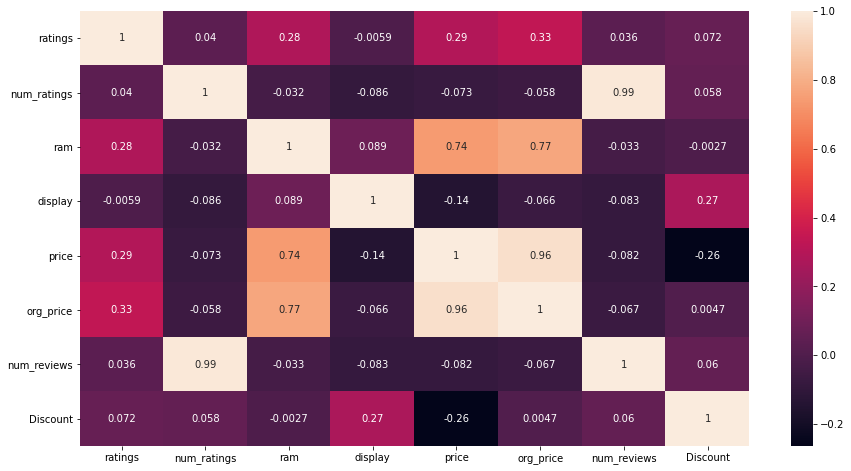

In [171]:
plt.figure(figsize=(15, 8))
corrmat = df_lappy.corr()
sns.heatmap(corrmat, annot = True)

In [172]:
df_lappy.drop(['ratings', 'num_ratings', 'price', 'num_reviews', 'Discount'], axis = 1, inplace = True)

In [173]:
df_lappy.head()

,ram,display,org_price
0,8,39.62,66190.0
1,4,39.62,42490.0
2,8,39.62,79999.0
3,8,33.78,84900.0
4,8,39.62,79690.0


# Skewness

<AxesSubplot:xlabel='ram'>

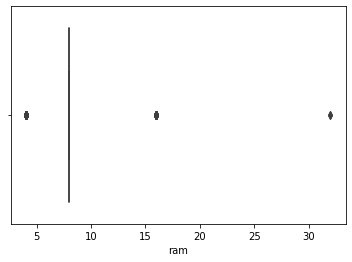

In [174]:
sns.boxplot(df_lappy.ram)

<AxesSubplot:xlabel='org_price'>

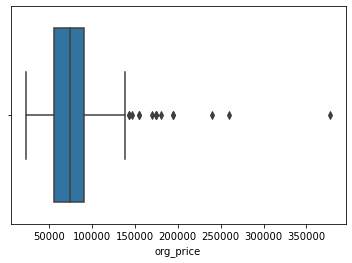

In [175]:
sns.boxplot(df_lappy.org_price)

# Transformation

<AxesSubplot:>

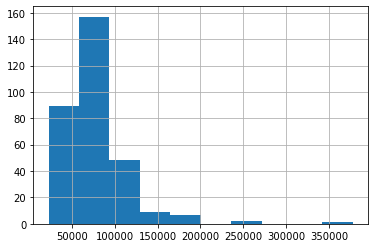

In [176]:
df_lappy.org_price.hist()

In [177]:
350000-40000

310000

In [178]:
np.log(50000)

10.819778284410283

In [179]:
min(df_lappy.org_price)

22825.0

In [180]:
max(df_lappy.org_price)

377798.0

In [181]:
np.log(350000)

12.765688433465597

In [182]:
np.log(250000)

12.429216196844383

<AxesSubplot:>

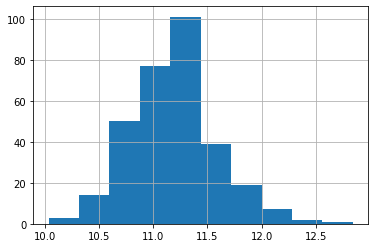

In [183]:
np.log(df_lappy.org_price).hist()

In [184]:
# org_price is right skewed

<AxesSubplot:>

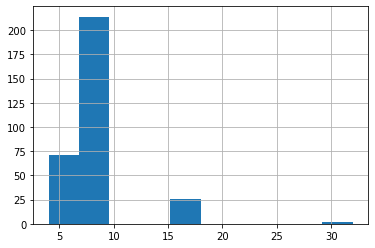

In [185]:
df_lappy.ram.hist()

1) Log Transformation
2) Exponential Transf
    a) sq tranhs
    b) cub trans
    c) sqrt transf

In [186]:
# -1 to 1
df_lappy.skew()

ram          2.684132
display     -0.577863
org_price    2.901847
dtype: float64

In [187]:
df_lappy.org_price = np.log(df_lappy.org_price)
df_lappy.ram = np.log(df_lappy.ram)

In [188]:
df_lappy.head()

,ram,display,org_price
0,2.079442,39.62,11.100285
1,1.386294,39.62,10.657024
2,2.079442,39.62,11.289769
3,2.079442,33.78,11.349229
4,2.079442,39.62,11.285899


In [189]:
min(df_lappy.org_price)

10.03561170546317

In [190]:
max(df_lappy.org_price)

12.842114940229287

In [191]:
# columns: features and variables
# Target Variable: Dependent Variable
# Independent Variables

In [192]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

OLS: Ordinary Least Squares

y = m1x1 + m2x2 + c

In [193]:
df_lappy.shape

(313, 3)

In [194]:
(313*80)/100

250.4

In [195]:
X = sm.add_constant(df_lappy)
X.drop('org_price', axis = 1, inplace = True)

Y = df_lappy['org_price']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(250, 3)
(250,)
(63, 3)
(63,)


In [196]:
train_y

533    10.657024
353    11.285899
114    10.652897
313    11.100285
38     11.719858
         ...    
223    10.657024
159    11.285899
17     11.303315
163    11.213036
458    11.141847
Name: org_price, Length: 250, dtype: float64

In [197]:
test_x.head()

,const,ram,display
174,1.0,2.079442,39.62
552,1.0,2.079442,33.78
306,1.0,2.079442,33.78
391,1.0,2.079442,39.62
420,1.0,2.772589,33.78


In [198]:
ols_model_1 = sm.OLS(train_y, train_x).fit()
print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              org_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     236.9
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           3.56e-58
Time:                        21:14:27   Log-Likelihood:                 9.8950
No. Observations:                 250   AIC:                            -13.79
Df Residuals:                     247   BIC:                            -3.226
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2806      0.230     44.616      0.0

org_price = 0.8373(ram) - 0.0197(display) + 10.2599

if pvalue < 0.05:   column is significant

else: column is useless

T-Test (t) is used to check if my column is significant or not
F-Stat is used to chck if my whole (complete) is significant or not

employees:
predict: salary
    
exp    skills   Flavour_of_icecream    Salary

R2 and Adj. R2

1) more the columns more the R2

2) ADJ R2 <<<<< R2

less AIC means better the model
2 or more than 2 models

MSE: Mean Squared Error
RMSE: Root Mean Squared Error
MAE: Mean Absolute Error

In [199]:
from sklearn.metrics import mean_squared_error

In [200]:
pred_y = ols_model_1.predict(test_x)

In [201]:
mean_squared_error(test_y, pred_y)

0.05531963895505988

In [202]:
np.sqrt(mean_squared_error(test_y, pred_y))

0.23520127328537124

# Approach 2

# RAM, Display and Storage

In [203]:
# Read the csv
df_lappy = pd.read_csv('lappy_eda.csv')
df_lappy.head()

,name,ratings,num_ratings,processor,ram,os,storage,display,price,org_price,Brand,num_reviews,ram_type,Discount
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,4.0,431.0,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62,42990,66190.0,Lenovo,62.0,DDR4,35.050612
1,Lenovo Ideapad S145 Core i3 10th Gen - (4 GB/1...,4.3,20.0,Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,1 TB HDD,39.62,31990,42490.0,Lenovo,4.0,DDR4,24.711697
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,5317.0,Intel Core i5 Processor (9th Gen),8,64 bit Windows 10 Operating System,512 GB SSD,39.62,49990,79999.0,Acer,979.0,DDR4,37.511719
3,Apple MacBook Air Core i5 5th Gen - (8 GB/128 ...,4.7,25629.0,Intel Core i5 Processor (5th Gen),8,64 bit Mac OS Operating System,128 GB SSD,33.78,59990,84900.0,Apple,2870.0,DDR3,29.340400
4,Lenovo Ideapad L340 Core i5 9th Gen - (8 GB/1 ...,4.8,55.0,Intel Core i5 Processor (9th Gen),8,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62,55990,79690.0,Lenovo,6.0,DDR4,29.740243


In [204]:
for i in range(df_lappy.shape[0]):
    if(pd.isnull(df_lappy['org_price'][i])):
        df_lappy['org_price'][i] = df_lappy['price'][i]

C:\Users\kolhe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
df_lappy.drop(['name','processor', 'os', 'Brand', 'ram_type', 'ratings', 'num_ratings', 'num_reviews', 'price', 'Discount'], axis = 1, inplace = True)

In [206]:
df_lappy.head(2)

,ram,storage,display,org_price
0,8,1 TB HDD,39.62,66190.0
1,4,1 TB HDD,39.62,42490.0


In [207]:
df_lappy.isnull().sum()

ram           0
storage      36
display       9
org_price     0
dtype: int64

In [208]:
df_lappy.storage.value_counts()

1 TB HDD               171
512 GB SSD             138
1 TB HDD|256 GB SSD     85
256 GB SSD              62
1 TB SSD                39
1 TB HDD|128 GB SSD     13
128 GB SSD              10
1 TB HDD|512 GB SSD      6
500 GB HDD               5
1 TB HDD|8 GB SSD        2
2 TB SSD                 2
2 TB HDD|256 GB SSD      2
2 TB HDD                 2
500 GB SSD               1
1 TB HDD|1 TB SSD        1
32 GB HDD                1
Name: storage, dtype: int64

In [209]:
df_lappy.storage[3].split()[2]

'SSD'

In [210]:
for i in range(df_lappy.shape[0]):
    if(pd.notnull(df_lappy['storage'][i])):
        if('|' in df_lappy['storage'][i]):
            df_lappy['storage'][i] = 'Both'
        else:
            df_lappy['storage'][i] = df_lappy['storage'][i].split()[2]

C:\Users\kolhe\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kolhe\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [211]:
df_lappy.head()

,ram,storage,display,org_price
0,8,HDD,39.62,66190.0
1,4,HDD,39.62,42490.0
2,8,SSD,39.62,79999.0
3,8,SSD,33.78,84900.0
4,8,Both,39.62,79690.0


In [212]:
df_lappy.storage.value_counts()

SSD     252
HDD     179
Both    109
Name: storage, dtype: int64

In [213]:
df_lappy.storage.mode()[0]

'SSD'

In [214]:
df_lappy.storage = df_lappy.storage.replace(np.nan, df_lappy.storage.mode()[0])

In [215]:
df_lappy.display = df_lappy.display.replace(np.nan, df_lappy.display.median())

In [216]:
df_lappy.isnull().sum()

ram          0
storage      0
display      0
org_price    0
dtype: int64

In [217]:
df_lappy.head()

,ram,storage,display,org_price
0,8,HDD,39.62,66190.0
1,4,HDD,39.62,42490.0
2,8,SSD,39.62,79999.0
3,8,SSD,33.78,84900.0
4,8,Both,39.62,79690.0


In [218]:
df_lappy.org_price = np.log(df_lappy.org_price)
df_lappy.ram = np.log(df_lappy.ram)

In [219]:
df_lappy = pd.get_dummies(df_lappy, drop_first=True)
df_lappy.head()

,ram,display,org_price,storage_HDD,storage_SSD
0,2.079442,39.62,11.100285,1,0
1,1.386294,39.62,10.657024,1,0
2,2.079442,39.62,11.289769,0,1
3,2.079442,33.78,11.349229,0,1
4,2.079442,39.62,11.285899,0,0


In [220]:
X = sm.add_constant(df_lappy)
X.drop('org_price', axis = 1, inplace = True)

Y = df_lappy['org_price']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(460, 5)
(460,)
(116, 5)
(116,)


In [221]:
ols_model_2 = sm.OLS(train_y, train_x).fit()
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              org_price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     284.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          3.18e-122
Time:                        21:14:44   Log-Likelihood:                -102.47
No. Observations:                 460   AIC:                             214.9
Df Residuals:                     455   BIC:                             235.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.1731      0.236     38.818      

In [224]:
pred_y_2 = ols_model_2.predict(test_x)

In [225]:
np.sqrt(mean_squared_error(test_y, pred_y_2))

0.2992998636883451

In [ ]:
model 1:  0.23
model 2:  0.30

In [223]:
df_lappy.drop(['storage_HDD', 'storage_SSD'], axis = 1, inplace = True)

In [226]:
df_lappy.head()

,ram,display,org_price
0,2.079442,39.62,11.100285
1,1.386294,39.62,10.657024
2,2.079442,39.62,11.289769
3,2.079442,33.78,11.349229
4,2.079442,39.62,11.285899


In [227]:
X = sm.add_constant(df_lappy)
X.drop('org_price', axis = 1, inplace = True)

Y = df_lappy['org_price']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(460, 3)
(460,)
(116, 3)
(116,)


In [228]:
ols_model_3 = sm.OLS(train_y, train_x).fit()
print(ols_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              org_price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     560.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          1.19e-123
Time:                        21:20:45   Log-Likelihood:                -105.55
No. Observations:                 460   AIC:                             217.1
Df Residuals:                     457   BIC:                             229.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2296      0.196     47.210      0.0

In [231]:
pred_y_3 = ols_model_3.predict(test_x)

In [232]:
np.sqrt(mean_squared_error(test_y, pred_y_3))

0.3056744549122622

In [ ]:
Model 1: 0.23
Model 2: 0.299
Model 3: 0.305

In [229]:
df_lappy.drop('display', axis = 1, inplace = True)

In [233]:
X = sm.add_constant(df_lappy)
X.drop('org_price', axis = 1, inplace = True)

Y = df_lappy['org_price']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(460, 2)
(460,)
(116, 2)
(116,)


In [235]:
ols_model_4 = sm.OLS(train_y, train_x).fit()
print(ols_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              org_price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1122.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):          3.01e-125
Time:                        21:24:08   Log-Likelihood:                -105.62
No. Observations:                 460   AIC:                             215.2
Df Residuals:                     458   BIC:                             223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1636      0.062    147.684      0.0

In [236]:
pred_y_4 = ols_model_4.predict(test_x)

In [237]:
np.sqrt(mean_squared_error(test_y, pred_y_4))

0.3054747512274055

In [ ]:
Model 1: 0.23
R2: 65%
    
Model 4: 0.305
R2: 71%

# Model 1

In [239]:
ram = 16
display = 35
ram = np.log(ram)

res = ols_model_1.predict([1, ram, display])
print(res)

[11.8778717]


In [240]:
np.exp(res)

array([144043.65576331])

# Model 2

In [242]:
ram = 16
display = 35


ram = np.log(ram)

res = ols_model_2.predict([1, ram, display, 1, 0])
print(res)

[11.87089082]


In [243]:
np.exp(res)

array([143041.6066374])

# Model 4

In [244]:
ram = 16

ram = np.log(ram)

res = ols_model_4.predict([1, ram])
print(res)

[11.96773757]


In [245]:
np.exp(res)

array([157587.72517462])